---
layout: default
title: "Neural Networks - Model Representation"
categories: neuralNetwork
permalink: /ML10/
order: 10
comments: true
---

In [2]:
%pylab --no-import-all inline
from plot_ann import ann
import pandas as pd
from graphviz import Digraph

Populating the interactive namespace from numpy and matplotlib


# Model Representation of Neural Network
Anatomical neurons are cells that are present in the brain in millions. A neuron has a cell body, a number of input wires, called *dendrites* and an output wire called *axon*.

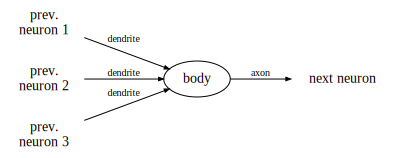

In [44]:
dot = Digraph(edge_attr={'arrowsize': '0.5', 'fontsize': '10'})

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('1', label='prev.\nneuron 1', shape='plaintext')
    s.node('2', label='prev.\nneuron 2', shape='plaintext')
    s.node('3', label='prev.\nneuron 3', shape='plaintext')

dot.node('b', label='body')
dot.node('a', shape='plaintext', label='next neuron')

for i in range(1, 4):
    dot.edge(str(i), 'b', label='dendrite')
dot.edge('b', 'a', label='axon')
dot.attr(rankdir='LR')
dot

In a simplistic way a neuron is a computational unit that receive some input via dendrites, does some computation and then outputs something via the axon to other neurons in the brain.

A neuron implemented on the computer has a very simple model that mimics the architecture of an anatomical neuron. We're a going to model a neuron as just a logistic unit. The yellow node represents the *body* of the neuron, which is fed input through its *dendrites*, and produces an output $h_\theta(x)$ that is produced by the neuron body, though its **activation function** and transported forward by the neuron *axon*. Where $h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$

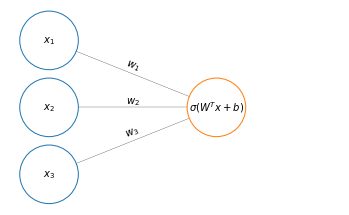

In [18]:
nodelabels=["$x_1$", "$x_2$", "$x_3$", r"$\sigma\left(W^Tx+b\right)$"]
edgelabels=["$w_1$", "$w_2$", "$w_3$"]
colors=['C0', 'C0', 'C0', 'C1']
ax, *_ = ann([3, 1], node_labels=nodelabels, 
             edge_labels=edgelabels, node_colors=True, 
             radius=2.5, height=.6, edge_label_spacing=0)
ax.set_aspect('equal')

A simpler representation is sometimes used to depict a neural network

$$
[x_0x_1x_2x_3]\to[]\to h_\theta(x)
$$

where $x_0$ (sometimes called the bias unit) is usually omitted in favor of another representation:

$$
[x_1x_2x_3]\to[]\to h_\theta(x)
$$

and the parameters, or **weights** ($w$) are accompanied by the **bias** $b$.

Until now we represented single neurons; a neural network is a group of different neurons connected together. The input nodes are grouped in what is called the **input layer** ($x$), which is always the first layer of the neural network. The final layer is called the **output layer**, since it computes the final value of our hypothesis. And all layers in between the input and the output layers are called **hidden layers**. They are called hidden layers because we can't observes the values computed by these nodes.

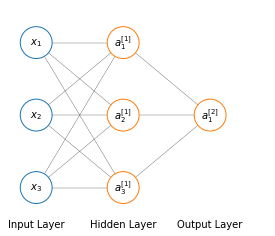

In [20]:
layers = ['Input Layer', 'Hidden Layer', 'Output Layer']
nodelabels = ['$x_1$', '$x_2$', '$x_3$', '$a^{[1]}_1$', '$a^{[1]}_2$', '$a^{[1]}_3$', '$a^{[2]}_1$']
ax, *_ = ann([3, 3, 1], node_labels=nodelabels, node_colors=True, layer_labels=layers, radius=2, width=1.2)
ax.set_aspect('equal')

<i id="simpleann">A simple neural network with one hidden layer</i>

The computational entities in a neural networks are:

* $a_i^{[j]}$  activation neuron/unit $i$ in layer $j$
* $W^{[j]}$ matrix of weights controlling the function mapping from layer $j$ to layer $j+1$ 
* $b^{[j]}$ the bias vectors

And the computation in the network

$$
\left[x_1 x_2 x_3 \right]\to \left[a_1^{[1]}a_2^{[1]}a_3^{[1]} \right]\to a_1^{[2]} \equiv \hat{y}
$$

# Forward propagation

The flow of the computation in the network in <a href="#simpleann">the figure above</a> from input (left) to prediction (right), called forward propagation, is just like that in logistic regression but a lot more times. In fact, each unit in layer $j$ is **densely connected** (namely is connected to all units in layer $j+1$) and we will have to compute a logistic regression for each connection.

So, for example, the computations that we will have to execute from the input layer to the first layer will be:

$$
\begin{align}
& a_1^{[1]} =
g \left(
\left( W_{11}^{[1]}x_1 + b^{[1]}_{11} \right) + 
\left( W_{12}^{[1]}x_2 + b^{[1]}_{12} \right) +
\left( W_{13}^{[1]}x_3 + b^{[1]}_{13} \right)
\right) \\
& a_2^{[1]} = 
g \left(
\left( W_{21}^{[1]}x_1 + b^{[1]}_{21} \right) + 
\left( W_{22}^{[1]}x_2 + b^{[1]}_{22} \right) +
\left( W_{23}^{[1]}x_3 + b^{[1]}_{23} \right)
\right) \\
& a_3^{[1]} = 
g \left(
\left( W_{31}^{[1]}x_1 + b^{[1]}_{31} \right) + 
\left( W_{32}^{[1]}x_2 + b^{[1]}_{32} \right) +
\left( W_{33}^{[1]}x_3 + b^{[1]}_{33} \right)
\right) \\
\end{align}
\label{eq:neuralnet} \tag{1}
$$

That is to say that we compute our hidden units in the first layer as a $3\times 4$ matrix of parameters $W^{[j]}_{ik}$, weighting the connection from unit $k$ in layer $j-1$ to unit $i$ in layer $j$.



In [46]:
w = pd.DataFrame(index=['$a^{[1]}_1$', '$a^{[1]}_2$', '$a^{[1]}_3$'], columns=['$x_1$', '$x_2$', '$x_3$'])
for i in range(0, 3):
    for j in range(0, 3):
        w.iloc[i, j] = '$W^{{[1]}}_{{{}{}}}$'.format(i+1, j+1)
w

,$x_1$,$x_2$,$x_3$
$a^{[1]}_1$,$W^{[1]}_{11}$,$W^{[1]}_{12}$,$W^{[1]}_{13}$
$a^{[1]}_2$,$W^{[1]}_{21}$,$W^{[1]}_{22}$,$W^{[1]}_{23}$
$a^{[1]}_3$,$W^{[1]}_{31}$,$W^{[1]}_{32}$,$W^{[1]}_{33}$


in other words $W^{[1]} \in \mathbb{R} ^{3\times 3}$.

The computations from the first to the second layer:

$$
\hat{y}= a_1^{[2]} =  
\left(
\left( W_{11}^{[2]}a_1^{[1]} +b^{[2]}_{11} \right) + 
\left( W_{12}^{[2]}a_2^{[1]} +b^{[2]}_{12} \right)+ 
\left( W_{13}^{[2]}a_3^{[1]} +b^{[2]}_{13} \right)
\right)
\label{eq:neuralnet_h} \tag{2}
$$

In general if a network has $s_j$ units in layer $j$, $s_{j+1}$ units in layer $j+1$, then $W^{[j]}$ will be of dimension $s_{j+1} \times s_j$

## Vectorization
Let's rewrite the argument of the functions $g$ in $\eqref{eq:neuralnet}$ as $z^{[j]}$ so that now we have

$$
\begin{align}
& a_1^{[1]} = g \left(z_1^{[1]}\right) \\
& a_2^{[1]} = g \left(z_2^{[1]}\right) \\
& a_3^{[1]} = g \left(z_3^{[1]}\right)
\end{align}
$$

Looking at $\eqref{eq:neuralnet}$ again, we can see that the way the arguments of $g$ in $a_1^{[1]}, a_2^{[1]}, a_2^{[1]}$ are disposed can be written as $W^{[1]}x$, where $x$ is a vector of inputs.

$$
\begin{split}
x=
\begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix}
\end{split}
\qquad
\begin{split}
z^{[1]}=
\begin{bmatrix}
z_1^{[1]}\\
z_2^{[1]}\\
z_3^{[1]}
\end{bmatrix}
\qquad
a^{[1]}=
\begin{bmatrix}
a_1^{[1]}\\
a_2^{[1]}\\
a_3^{[1]}
\end{bmatrix}
\end{split}
$$

$$
\begin{align}
&z^{[1]}=W^{[1]}x +b^{[1]}\\
&a^{[1]}=g\left(z^{[1]}\right)
\end{align}
$$

Where $a^{[1]}$ and $z^{[1]}$ are $\mathbb{R}^3$ vectors. Now we could say that the input layer is also an activation layer and call it $a^{[0]}$ so that

$$
z^{[1]}=W^{[1]}a^{[0]} + b^{[1]}
$$

What we have written so far give us the value for $ a^{[1]}_1, a^{[1]}_2, a^{[1]}_3 $.

We can now compute $\hat{y} \eqref{eq:neuralnet_h}$

$$
\begin{align}
&z^{[2]}=W^{[2]}a^{[1]} + v^{[2]} \\
&\hat{y}=a^{[2]} = g\left(z^{[2]}\right)
\end{align}
$$

or more generally

$$
\begin{align}
&z^{[j]}=W^{[j]}a^{[j-1]} + b^{[j]} \\
&\hat{y}=a^{[j]} = g\left(z^{[j]}\right)
\end{align}
$$


This process is called **forward propagation**

# Neural networks learn their own features
Let's take the network used as example above and focus on the last two layers

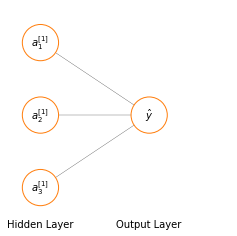

In [22]:
nodelabels=["$a_1^{[1]}$", "$a_2^{[1]}$", "$a_3^{[1]}$", '$\\hat{y}$']
colors=['C1'] * 4
layers = ['Hidden Layer', 'Output Layer']
ax, *_ = ann([3, 1], node_labels=nodelabels, node_colors=colors, layer_labels=layers, radius=2)
ax.set_aspect('equal')

What is left in this neural network is simply logistic regeression, where we use the output unit (or logistic regression unit) to build the hypothesis $\hat{y}$

$$
\hat{y} = \sigma \left(w_{10}^{[2]}a_0^{[1]}+w_{11}^{[2]}a_1^{[1]}+w_{12}^{[2]}a_2^{[1]}+ w_{13}^{[2]}a_3^{[1]} \right)
$$

Where the features fed into logistic regression are the values in $a^{[1]}$. And here resides the fundamental difference between neural networks and logistic regression: the features $A^{[1]}$ they themselves are learned as functions of the input $x$ with some other set of parameters $W^{[1]}$

The neural network, instead of being constrained to feed the features $x$ to logistic regression, learns its own features $A^{[1]}$ to feed into logistic regression. Depending on the parameters $W^{[1]}$, it can learn some complex features and result in a better hypothesis that you could have if you were constrained to use features $x$ or even if you had to manually set some higher order polynomial features combining the features $x$.

Neural networks can have different number and dimension of hidden layers and the way a neural network is connected is called its **architecture**.

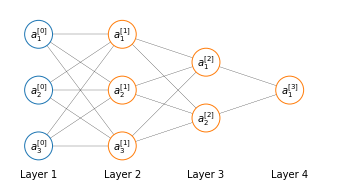

In [7]:
ax, *_ = ann([3, 3, 2, 1], node_labels=True, node_colors=True, layer_labels=True, radius=2, width=2)
ax.set_aspect('equal');

## Vectorization
<a href="#simpleann">The simple one-hidden-layer neural network depicted above</a> is described by the set of equations:

$$
\begin{aligned}
&z^{[1]}= W^{[1]}x + b^{[1]} \\
&a^{[1]} = \sigma(z^{[1]})\\
&z^{[2]}= W^{[1]}a^{[1]} + b^{[2]}\\
&a^{[2]} = \sigma(z^{[2]})\\
\end{aligned}
$$

This process must be repeated for each training example $x^{(n)}$ and will produce $n$ outputs $a^{[2](n)} = \hat{y}^{(n)}$

In a non-vectorized implementation you would have something along the lines of:

```python
for i in len(examples):
    z[1][i] = w[1] @ x(i) + b[i]
    a[1][i] = sigmoid(z[1][i])
    z[2][i] = w[2] @ x(i) + b[i]
    a[2][i] = sigmoid(z[2][i])
```

Given our vector of training examples:

$$
X=
\begin{bmatrix}
&\vdots&\vdots&&\vdots\\
&x^{(1)}&x^{(2)}&\dots&x^{(m)}\\
&\vdots&\vdots&&\vdots\\
\end{bmatrix} \in \mathbb{R}^{n\times m}
$$

So this means that our vectorized implementation becomes

$$
\begin{aligned}
&Z^{[1]}= W^{[1]}X + b^{[1]} \\
&A^{[1]} = \sigma(z^{[1]})\\
&Z^{[2]}= W^{[2]}A^{[1]} + b^{[2]}\\
&A^{[2]} = \sigma(Z^{[2]})\\
\end{aligned}
$$

with $Z^{[1]}$ and $A^{[1]}$ represent the $z$-values and $a$-values of the first layer of the neural network:

$$
Z^{[1]}=
\begin{bmatrix}
&\vdots&\vdots&&\vdots\\
&z^{[1](1)}&z^{[1](2)}&\dots&z^{[1](m)}\\
&\vdots&\vdots&&\vdots\\
\end{bmatrix} \in \mathbb{R}^{n^{[1]} \times m} 
\qquad 
A^{[1]}=
\begin{bmatrix}
&\vdots&\vdots&&\vdots\\
&a^{[1](1)}&a^{[1](2)}&\dots&a^{[1](m)}\\
&\vdots&\vdots&&\vdots\\
\end{bmatrix} \in \mathbb{R}^{n^{[1]} \times m}
$$

where $m$ is the number of training examples and $n^{[1]}$ is the number of nodes (hidden units) in the first layer of the neural networks.